## spark preparation

In [ ]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext
sc = SparkContext()

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

## parse the xml file

In [4]:
#funtion for CSV conversion
def xml2csv(line,tags_list):
    offset=0
    result=""
    for i in tags_list:
        val=""
        patt=i+"="
        ind=line.find(patt,offset)
        if(ind==-1):
            result+=','
            continue
        ind+=(len(i)+2)
        val+='\"'
        while(line[ind]!='\"'):
            val+=line[ind]
            ind+=1
        val+='\"'
        result+=val+','
        offset=ind
    return result[:-1]

In [5]:
fileName = 's3://my4dbucket/math/Posts.xml'

In [6]:
raw = (sc.textFile(fileName, 4))

In [7]:
#Removing top 2 lines form XML file,they didn't contain useful data
headers = raw.take(2)
UsersRDD = raw.filter(lambda x: (x != headers[0]) & (x != headers[1]))

In [8]:
UsersRDD.take(5)

['  <row Id="1" PostTypeId="1" AcceptedAnswerId="9" CreationDate="2010-07-20T19:09:27.200" Score="156" ViewCount="8964" Body="&lt;p&gt;Can someone explain to me how there can be different kinds of infinities?&lt;/p&gt;&#xA;&#xA;&lt;p&gt;I was reading &quot;&lt;a href=&quot;http://en.wikipedia.org/wiki/The_Man_Who_Loved_Only_Numbers&quot; rel=&quot;noreferrer&quot;&gt;The man who loved only numbers&lt;/a&gt;&quot; by &lt;a href=&quot;http://en.wikipedia.org/wiki/Paul_Hoffman_(science_writer)&quot; rel=&quot;noreferrer&quot;&gt;Paul Hoffman&lt;/a&gt; and came across the concept of countable and uncountable infinities, but they\'re only words to me.&lt;/p&gt;&#xA;&#xA;&lt;p&gt;Any help would be appreciated.&lt;/p&gt;&#xA;" OwnerUserId="10" LastEditorUserId="32803" LastEditorDisplayName="user126" LastEditDate="2018-03-01T19:53:22.017" LastActivityDate="2020-01-28T03:26:12.530" Title="What Does it Really Mean to Have Different Kinds of Infinities?" Tags="&lt;elementary-set-theory&gt;&lt;int

In [9]:
#FieldNames for Users: extract the features we need
tags_list=['Id', 'PostTypeId', 'ParentId','CreationDate','Score', 'Body','OwnerUserId', 
           'Title', 'Tags', 'AnswerCount', 'CommentCount']

In [10]:
Users_csvRDD=UsersRDD.map(lambda x:xml2csv(x,tags_list))

In [11]:
Users_csvRDD.take(4)

['"1","1",,"2010-07-20T19:09:27.200","156","&lt;p&gt;Can someone explain to me how there can be different kinds of infinities?&lt;/p&gt;&#xA;&#xA;&lt;p&gt;I was reading &quot;&lt;a href=&quot;http://en.wikipedia.org/wiki/The_Man_Who_Loved_Only_Numbers&quot; rel=&quot;noreferrer&quot;&gt;The man who loved only numbers&lt;/a&gt;&quot; by &lt;a href=&quot;http://en.wikipedia.org/wiki/Paul_Hoffman_(science_writer)&quot; rel=&quot;noreferrer&quot;&gt;Paul Hoffman&lt;/a&gt; and came across the concept of countable and uncountable infinities, but they\'re only words to me.&lt;/p&gt;&#xA;&#xA;&lt;p&gt;Any help would be appreciated.&lt;/p&gt;&#xA;","10","What Does it Really Mean to Have Different Kinds of Infinities?","&lt;elementary-set-theory&gt;&lt;intuition&gt;&lt;infinity&gt;&lt;faq&gt;","9","0"',
 '"3","1",,"2010-07-20T19:12:14.353","120","&lt;p&gt;&lt;a href=&quot;http://mathfactor.uark.edu/&quot;&gt;mathfactor&lt;/a&gt; is one I listen to.  Does anyone else have a recommendation?&lt;/p&

In [12]:
#Folder path to save processed files
targetFile = './Post_csv'

In [13]:
Users_csvRDD.saveAsTextFile(targetFile)

In [5]:
## csv file
post = sc.textFile('./Post_csv').cache()

In [6]:
post.take(5)

['"1","1",,"2010-07-20T19:09:27.200","156","&lt;p&gt;Can someone explain to me how there can be different kinds of infinities?&lt;/p&gt;&#xA;&#xA;&lt;p&gt;I was reading &quot;&lt;a href=&quot;http://en.wikipedia.org/wiki/The_Man_Who_Loved_Only_Numbers&quot; rel=&quot;noreferrer&quot;&gt;The man who loved only numbers&lt;/a&gt;&quot; by &lt;a href=&quot;http://en.wikipedia.org/wiki/Paul_Hoffman_(science_writer)&quot; rel=&quot;noreferrer&quot;&gt;Paul Hoffman&lt;/a&gt; and came across the concept of countable and uncountable infinities, but they\'re only words to me.&lt;/p&gt;&#xA;&#xA;&lt;p&gt;Any help would be appreciated.&lt;/p&gt;&#xA;","10","What Does it Really Mean to Have Different Kinds of Infinities?","&lt;elementary-set-theory&gt;&lt;intuition&gt;&lt;infinity&gt;&lt;faq&gt;","9","0"',
 '"3","1",,"2010-07-20T19:12:14.353","120","&lt;p&gt;&lt;a href=&quot;http://mathfactor.uark.edu/&quot;&gt;mathfactor&lt;/a&gt; is one I listen to.  Does anyone else have a recommendation?&lt;/p&

In [7]:
import sys
import os,datetime,re


class math_post():
    def __init__(self, record):
        self.Id = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", record)[0]
        self.PostTypeId = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", record)[1]
        self.ParentId = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", record)[2]
        self.CreationDate = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", record)[3]
        self.Score = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", record)[4]
        self.Body = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", record)[5]
        self.OwnerUserId = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", record)[6]
        self.Title = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)" , record)[7]
        self.Tags = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)" , record)[8]
        self.AnswerCount = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)" , record)[9]
        self.CommentCount = re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)" , record)[10]

In [8]:
from pyspark.sql import Row
lines = post.map(lambda record: math_post(record)).map(lambda q: Row(Id = q.Id,
                                                                     PostTypeId = q.PostTypeId,
                                                                     ParentId = q.ParentId,
                                                                     CreationDate= q.CreationDate,
                                                                     Score = q.Score,
                                                                     Body = q.Body,
                                                                     OwnerUserId = q.OwnerUserId,
                                                                     Title = q.Title,
                                                                     Tags = q.Tags,
                                                                     AnswerCount = q.AnswerCount,
                                                                     CommentCount = q.CommentCount
                                                                    ))
lines.take(3)

[Row(AnswerCount='"9"', Body='"&lt;p&gt;Can someone explain to me how there can be different kinds of infinities?&lt;/p&gt;&#xA;&#xA;&lt;p&gt;I was reading &quot;&lt;a href=&quot;http://en.wikipedia.org/wiki/The_Man_Who_Loved_Only_Numbers&quot; rel=&quot;noreferrer&quot;&gt;The man who loved only numbers&lt;/a&gt;&quot; by &lt;a href=&quot;http://en.wikipedia.org/wiki/Paul_Hoffman_(science_writer)&quot; rel=&quot;noreferrer&quot;&gt;Paul Hoffman&lt;/a&gt; and came across the concept of countable and uncountable infinities, but they\'re only words to me.&lt;/p&gt;&#xA;&#xA;&lt;p&gt;Any help would be appreciated.&lt;/p&gt;&#xA;"', CommentCount='"0"', CreationDate='"2010-07-20T19:09:27.200"', Id='"1"', OwnerUserId='"10"', ParentId='', PostTypeId='"1"', Score='"156"', Tags='"&lt;elementary-set-theory&gt;&lt;intuition&gt;&lt;infinity&gt;&lt;faq&gt;"', Title='"What Does it Really Mean to Have Different Kinds of Infinities?"'),
 Row(AnswerCount='"21"', Body='"&lt;p&gt;&lt;a href=&quot;http://

In [9]:
temp = spark.createDataFrame(lines).cache()

In [10]:
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql.functions import unix_timestamp, from_unixtime

def stripDQ(string):
    return string.replace('"', "")
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, IntegerType
udf_stripDQ = udf(stripDQ, StringType())

to_date =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

In [11]:
post_df = temp.withColumn("Body", udf_stripDQ(temp["Body"]))
post_df = post_df.withColumn("CreationDate", udf_stripDQ(temp["CreationDate"]))
post_df = post_df.withColumn("ParentId", udf_stripDQ(temp["ParentId"]))
post_df = post_df.withColumn("Id", udf_stripDQ(temp["Id"]))
post_df = post_df.withColumn("OwnerUserId", udf_stripDQ(temp["OwnerUserId"]))
post_df = post_df.withColumn("Score", udf_stripDQ(temp["Score"]))
post_df = post_df.withColumn("Title", udf_stripDQ(temp["Title"]))
post_df = post_df.withColumn("PostTypeId", udf_stripDQ(temp["PostTypeId"]))
post_df = post_df.withColumn("Tags", udf_stripDQ(temp["Tags"]))
post_df = post_df.withColumn("AnswerCount", udf_stripDQ(temp["AnswerCount"]))
post_df = post_df.withColumn("CommentCount", udf_stripDQ(temp["CommentCount"]))

In [12]:
post_df = post_df.withColumn("Score", post_df["Score"].cast(IntegerType()))

In [14]:
post_df.printSchema()

root
 |-- AnswerCount: string (nullable = true)
 |-- Body: string (nullable = true)
 |-- CommentCount: string (nullable = true)
 |-- CreationDate: string (nullable = true)
 |-- Id: string (nullable = true)
 |-- OwnerUserId: string (nullable = true)
 |-- ParentId: string (nullable = true)
 |-- PostTypeId: string (nullable = true)
 |-- Score: integer (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)



In [11]:
post_df.show(5)

+-----------+--------------------+------------+--------------------+---+-----------+--------+----------+-----+--------------------+--------------------+
|AnswerCount|                Body|CommentCount|        CreationDate| Id|OwnerUserId|ParentId|PostTypeId|Score|                Tags|               Title|
+-----------+--------------------+------------+--------------------+---+-----------+--------+----------+-----+--------------------+--------------------+
|          9|&lt;p&gt;Can some...|           0|2010-07-20T19:09:...|  1|         10|        |         1|  156|&lt;elementary-se...|What Does it Real...|
|         21|&lt;p&gt;&lt;a hr...|           4|2010-07-20T19:12:...|  3|         29|        |         1|  120|&lt;soft-question...|List of interesti...|
|           |&lt;p&gt;&lt;a hr...|           2|2010-07-20T19:14:...|  4|         31|       3|         2|   11|                    |                    |
|         14|&lt;p&gt;I have r...|           7|2010-07-20T19:18:...|  5|         3

In [18]:
# post_df.groupBy('Id').count().sort(F.desc('count')).show()

In [13]:
post_df.createOrReplaceTempView('post')

In [12]:
questions = spark.sql('''select Body,CreationDate,Id,OwnerUserId,Score,Tags, Title from post
where PostTypeId = 1''')

In [13]:
type(questions)

pyspark.sql.dataframe.DataFrame

In [23]:
questions.count()

1257199

## transform the pyspark.sql.dataframe.DataFrame into andas.core.frame.DataFrame

### As the datafile is too large, we need to seperate the file into parts so that when these files are being processed seperately, they will not exceed the maximum affordability of relevant functions

In [38]:
question1 = spark.sql('''select Id,OwnerUserId,CreationDate,Score,Title,Body,Tags from post
where PostTypeId = 1 and Id <= 400000 ''')

In [39]:
question2 = spark.sql('''select Id,OwnerUserId,CreationDate,Score,Title,Body,Tags  from post
where PostTypeId = 1 and Id>400000 and Id<=800000 ''')

In [18]:
question2.count()

132468

In [40]:
question3 = spark.sql('''select Id,OwnerUserId,CreationDate,Score,Title,Body,Tags  from post
where PostTypeId = 1 and Id>800000 and Id<=1200000''')

In [41]:
question4 = spark.sql('''select Id,OwnerUserId,CreationDate,Score,Title,Body,Tags  from post
where PostTypeId = 1 and Id>1200000 and Id <=1600000''')

In [42]:
question5 = spark.sql('''select Body,CreationDate,Id,OwnerUserId,Score,Tags, Title from post
where PostTypeId = 1 and Id>1600000 and Id<=2000000''')

In [43]:
question6 = spark.sql('''select Body,CreationDate,Id,OwnerUserId,Score,Tags, Title from post
where PostTypeId = 1 and Id>2000000 and Id<=2400000''')

In [44]:
question7 = spark.sql('''select Body,CreationDate,Id,OwnerUserId,Score,Tags, Title from post
where PostTypeId = 1 and Id>2400000 and Id <= 2800000''')

In [45]:
question8 = spark.sql('''select Body,CreationDate,Id,OwnerUserId,Score,Tags, Title from post
where PostTypeId = 1 and Id>2800000 and Id<=3200000''')

In [31]:
question9 = spark.sql('''select Body,CreationDate,Id,OwnerUserId,Score,Tags, Title from post
where PostTypeId = 1 and Id>3200000''')

In [27]:
question6.count()

136762

In [32]:
question9.count()

189526

In [33]:
import pandas as pd
def _map_to_pandas(rdds):
    return [pd.DataFrame(list(rdds))]
    
def topas(df, n_partitions=None):
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand

In [34]:
question9 = topas(question9,10)  # use the largest file to see whether it exceeds the maximum affordability of the function

In [46]:
# transform all the files
question1 = topas(question1,10)
question2 = topas(question2,10)
question3 = topas(question3,10)
question4 = topas(question4,10)
question5 = topas(question5,10)
question6 = topas(question6,10)
question7 = topas(question7,10)
question8 = topas(question8,10)

In [47]:
questions = pd.concat(objs=[question1,question2,question3,question4,question5,question6,question7,question8,question9],axis=0,join="outer")

In [48]:
type(questions)

pandas.core.frame.DataFrame

In [49]:
questions.head(5)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Tags
0,12639,2626,2010-12-01T17:05:13.137,10,Understanding Limits of Integration in Integra...,&lt;p&gt;My understanding of integration-by-pa...,&lt;calculus&gt;&lt;integration&gt;&lt;definit...
1,21645,6904,2011-02-12T06:47:58.173,5,Restricted Compositions,&lt;p&gt;&lt;a href=&quot;http://en.wikipedia....,&lt;combinatorics&gt;
2,43264,11754,2011-06-04T21:18:05.840,10,Double-cover of a Klein-bottle-esque Space,&lt;p&gt;I'm trying to complete the following ...,&lt;general-topology&gt;&lt;algebraic-topology...
3,15793,5191,2010-12-29T04:03:51.913,8,Measure-preserving transformations and invaria...,&lt;p&gt;Let $\tau: E \to E$ be a measure-pres...,&lt;probability-theory&gt;&lt;measure-theory&gt;
4,41849,9054,2011-05-28T18:06:16.397,9,Why does the trivial representation have degre...,&lt;p&gt;If you have a representation from $G ...,&lt;abstract-algebra&gt;&lt;representation-the...


In [50]:
a1 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id <= 400000 ''')
a2 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and id>400000 and Id <= 800000 ''')
a3 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id>800000 and Id <= 1200000 ''')
a4 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id>1200000 and Id <= 1600000 ''')
a5 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id>1600000 and Id <= 2000000 ''')
a6 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id>2000000 and Id <= 2400000 ''')
a7 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id>2400000 and Id <= 2800000 ''')
a8 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id>2800000 and Id <= 3200000 ''')
a9 = spark.sql('''select Id,OwnerUserId,CreationDate,ParentId,Score,Body from post
where PostTypeId = 2 and Id>3200000''')


In [51]:
a1 = topas(a1,10)
a2 = topas(a2,10)
a3 = topas(a3,10)
a4 = topas(a4,10)
a5 = topas(a5,10)
a6 = topas(a6,10)
a7 = topas(a7,10)
a8 = topas(a8,10)
a9 = topas(a9,10)

In [52]:
answers = pd.concat(objs=[a1,a2,a3,a4,a5,a6,a7,a8,a9],axis=0,join="outer")

In [53]:
answers.head(5)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,275182,33337,2013-01-10T14:56:37.857,275171,1,&lt;p&gt;$$f(x)=3x^4−6x^3+4x^2−7x+3=(x+2)(3x^3...
1,282441,30938,2013-01-20T02:37:04.343,276858,0,&lt;p&gt;I have no idea about how to solve thi...
2,260337,40030,2012-12-16T23:44:00.803,260315,3,&lt;p&gt;Brian already answered the first ques...
3,278434,,2013-01-14T07:00:04.443,278427,4,&lt;p&gt;$$\exp(x) \exp(y) = \left(\sum_{m=0}^...
4,306490,8140,2013-02-17T20:44:25.550,306425,2,&lt;p&gt;There were two questions. The first q...


In [ ]:
# import sys
# print(sys.executable)

In [ ]:
# !/home/hadoop/miniconda/bin/python -m pip install wordcloud

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS

In [103]:
Questions = questions.sample(replace=False,frac=0.01,random_state=1)
Answers = answers.sample(replace=False,frac=0.01,random_state=1)

In [104]:
User_id_inQ= Questions['OwnerUserId'].unique()
User_id_inA= Answers['OwnerUserId'].unique()

In [105]:
All_id=set(User_id_inQ).intersection(User_id_inA)

In [106]:
print('So we have '+str(len(All_id))+' users that post both questions and answers on StackOverFlow')

So we have 848 users that post both questions and answers on StackOverFlow


In [107]:
users=pd.DataFrame({'idUser':list(All_id)})
users['Quantity']=users['idUser'].apply(lambda x: len(Questions[Questions['OwnerUserId']==x]['Body'])+len(Answers[Answers['OwnerUserId']==x]['Body']))

In [110]:
users_final=users.sort_values(['Quantity'],ascending=0).reset_index(drop=True)

In [111]:
users_final=users_final.iloc[0:10000,]

In [112]:
All_id=list(users_final['idUser'])

In [195]:
from html.parser import HTMLParser
import re
import nltk
from nltk.corpus import stopwords
import numpy as np

In [202]:
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

def clean(text):
    removed_html=strip_tags(text)
    letters_only = re.sub("[^a-zA-Z]", " ", removed_html) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words(["english"]))     
    global meaningful_words
    meaningful_words = [w for w in words if not w in stops] 
    
    # delete duplicate words
    meaningful_words = np.unique(meaningful_words)
    meaningful_words = list(meaningful_words)
    return(meaningful_words)

In [203]:
Q_data=Questions[['OwnerUserId','Body']]
A_data=Answers[['OwnerUserId','Body']]
Question=Q_data[Q_data['OwnerUserId'].isin(All_id)]
Answer=A_data[A_data['OwnerUserId'].isin(All_id)]

In [222]:
# use try and except to avoid warnings
try:    
    Question['Non_html_body']=Question['Body'].apply(lambda x:strip_tags(str(x)))
    Answer['Non_html_body']=Answer['Body'].apply(lambda x:strip_tags(str(x)))
except:
    pass

In [223]:
# import nltk
# nltk.download('stopwords')

In [224]:
try:
    Question['Q_words']=Question['Body'].apply(lambda x:clean(str(x)))
    Answer['A_words']=Answer['Body'].apply(lambda x:clean(str(x)))
except:
    pass

In [225]:
User_id=All_id
Question_corpus=[]
Answer_corpus=[]
for id in All_id:
    Q_frame=Question[Question['OwnerUserId']==id].reset_index(drop=True)
    A_frame=Answer[Answer['OwnerUserId']==id].reset_index(drop=True)
    for i in range(len(Q_frame['OwnerUserId'])):
        if i==0:
            tmp=Q_frame['Q_words'][i]
        else:
            tmp=tmp+Q_frame['Q_words'][i]
    Question_corpus.append(tmp)
    
    for j in range(len(A_frame['OwnerUserId'])):
        if j==0:
            tmp2=A_frame['A_words'][j]
        else:
            tmp2=tmp2+A_frame['A_words'][j]
    Answer_corpus.append(tmp2)

In [208]:
User_id[1]

'39174'

In [226]:
Question_C=[]
Answer_C=[]
for i in range(len(Question_corpus)):
    tmp1=" ".join(Question_corpus[i])
    tmp2=" ".join(Answer_corpus[i])
    Question_C.append(tmp1)
    Answer_C.append(tmp2)

In [227]:
Final_frame=pd.DataFrame({'User_id':User_id,'Question':Question_C,'Answer':Answer_C})

In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
Q_features=tfidf.fit_transform(Question_C)
A_features=tfidf.fit_transform(Answer_C)

### KNN

In [212]:
from sklearn.neighbors import NearestNeighbors
knn_1=NearestNeighbors(n_neighbors=30,algorithm='brute',metric='cosine')
knn_2=NearestNeighbors(n_neighbors=30,algorithm='brute',metric='cosine')
Question_fit=knn_1.fit(Q_features)
Answer_fit=knn_2.fit(A_features)

### Answer question 1: Which users also ask the similar quesions?

In [229]:
def Question_f(user_id):
    ###Find the corresponding features##
    index=Final_frame[Final_frame['User_id']==User_id].index.tolist()
    ### Word Cloud##
    Question_word=Question_C[index[1]]
    wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(Question_word)
    Neighbors = Question_fit.kneighbors(Q_features[index[0]])[1].tolist()[0][1:]
    Users=np.array(User_id)[Neighbors].tolist()
    print('= ='*50)
    print("User's question is always featured by words below")
    plt.figure(1,figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    print('= ='*50)
    print('The top five users that always ask similar questions are: '+str(Users[0])+' '+str(Users[1])+' '+str(Users[2])+' '+str(Users[3])+' '+str(Users[4]))
    print('= ='*50)
    User_question=Question[Question['OwnerUserId']==user_id].reset_index(drop=True)['Non_html_body'][0]
    print('Example: Question of user:\n'+User_question)
    print('= ='*50)
    Question2=Question[Question['OwnerUserId']==Users[0]].reset_index(drop=True)['Non_html_body'][0]
    print('Example: Question from a similar user:\n'+Question2)

In [158]:
Final_frame.sample(5)

,User_id,Question,Answer
275,436477,p consider span class math container l l cdots...,p p n represents number partitions n number n ...
657,359447,blockquote p prove probability triple omega ma...,p late reply proof posted problem marked dupli...
533,199074,p let n sequence real numbers define ces ro li...,p perhaps specific example help integers posit...
727,19811,p mathbb r define sobolev space begin equation...,p quite sure mean construction lebesgue measur...
716,519413,p let span class math container k x geq span s...,p matter definition span class math container ...


= == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == =
User's question is always featured by words below


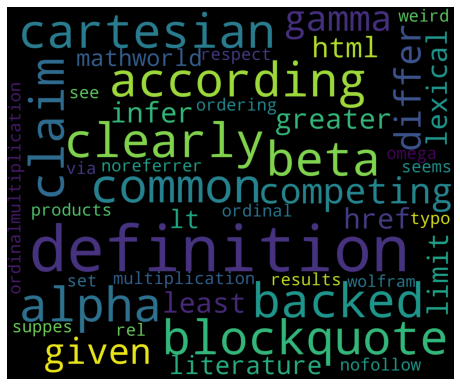

= == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == =
The top five users that always ask similar questions are: 47771 24690 444015 266135 54398
= == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == =


In [230]:
try:
    Question_f(19811)
except:
    pass

### Answer question 2: Which users also answer the same or similar quesions?

In [233]:
def Answer_f(user_id):
    ###Find the corresponding features##
    index=Final_frame[Final_frame['User_id']==User_id].index.tolist()
    ### Word Cloud##
    Answer_word=Answer_C[index[0]]
    wordcloud = WordCloud(background_color='lightblue',
                      width=3000,
                      height=2500
                     ).generate(Answer_word)
    Neighbors = Answer_fit.kneighbors(A_features[index[0]])[1].tolist()[0][1:]
    Users=np.array(User_id)[Neighbors].tolist()
    print('= ='*50)
    print("User's answer is always featured by words below")
    plt.figure(1,figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    print('= ='*50)
    print('The top five users that always provide similar answers are: '+str(Users[0])+' '+str(Users[1])+' '+str(Users[2])+' '+str(Users[3])+' '+str(Users[4]))
    print('= ='*50)
    User_answer=Answer[Answer['OwnerUserId']==user_id].reset_index(drop=True)['Non_html_body'][0]
    print('Example: Answer from user:\n'+User_answer)
    print('= ='*50)
    Answer2=Answer[Answer['OwnerUserId']==Users[0]].reset_index(drop=True)['Non_html_body'][0]
    print('Example: Answer from a similar user:\n'+Answer2)

= == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == =
User's answer is always featured by words below


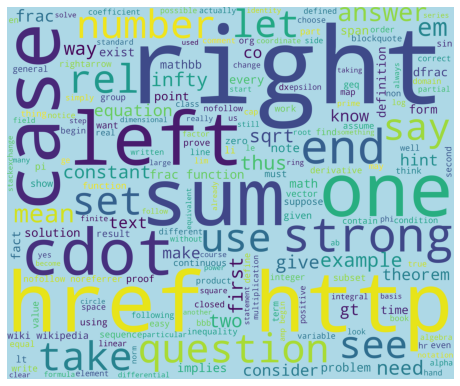

= == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == =
The top five users that always provide similar answers are: 39174 8508 11667 15500 72031
= == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == =


In [234]:
try:
    Answer_f(436477)
except:
    pass

In [236]:
sc.stop()